# Resumen de Resultados - Proyecto Dark Matter

En este notebook se presentan los resultados más relevantes del modelo de detección de candidatas a materia oscura, obtenidos a partir de la fusión de:
- Probabilidad de materia oscura (`prob_ann`) generada por una red neuronal.
- Score de anomalía (`anomaly_score_norm`) obtenido mediante One-Class SVM.

Se visualizan los Top 5 candidatos, los gráficos principales y el resumen del log de ejecución.

In [119]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [120]:
project_root = os.path.abspath(os.path.join(os.path.dirname("."), '..'))
results_dir = os.path.join(project_root, 'outputs', 'results')

# Detectar archivos más recientes
files = [f for f in os.listdir(results_dir) if f.startswith('unids_combined_ann_ocsvm_') and f.endswith('.csv')]
files.sort(key=lambda x: os.path.getmtime(os.path.join(results_dir, x)), reverse=True)
latest_csv = files[0]
csv_path = os.path.join(results_dir, latest_csv)

# Detectar Top 5
top5_files = [f for f in os.listdir(results_dir) if f.startswith('top5_unids_ann_ocsvm_')]
top5_files.sort(key=lambda x: os.path.getmtime(os.path.join(results_dir, x)), reverse=True)
top5_path = os.path.join(results_dir, top5_files[0])

# Detectar gráficos
scatter_files = [f for f in os.listdir(results_dir) if f.startswith('scatter_ann_vs_anomaly_')]
bar_files = [f for f in os.listdir(results_dir) if f.startswith('top10_combined_ann_ocsvm_')]
scatter_path = os.path.join(results_dir, sorted(scatter_files, key=lambda x: os.path.getmtime(os.path.join(results_dir, x)), reverse=True)[0])
bar_path = os.path.join(results_dir, sorted(bar_files, key=lambda x: os.path.getmtime(os.path.join(results_dir, x)), reverse=True)[0])

# Detectar log
log_files = [f for f in os.listdir(results_dir) if f.startswith('fuse_ann_ocsvm_log_')]
log_files.sort(key=lambda x: os.path.getmtime(os.path.join(results_dir, x)), reverse=True)
log_path = os.path.join(results_dir, log_files[0])

In [121]:
df_top5 = pd.read_csv(top5_path)
print("Top 5 UNIDs con mayor score combinado:")
df_top5.style.bar(subset=['prob_ann', 'anomaly_score_norm', 'combined_score'], color='red')

Top 5 UNIDs con mayor score combinado:


,number,prob_ann,anomaly_score,anomaly_score_norm,combined_score
0,717.000000,0.998058,-11.309239,1.000000,0.999029
1,631.000000,0.970258,-11.309259,0.880854,0.925556
2,763.000000,0.966221,-11.309277,0.773891,0.870056
3,554.000000,0.992657,-11.309288,0.711489,0.852073
4,682.000000,0.993922,-11.309317,0.542833,0.768377


Scatter Plot: Probabilidad ANN vs Score Anomalía


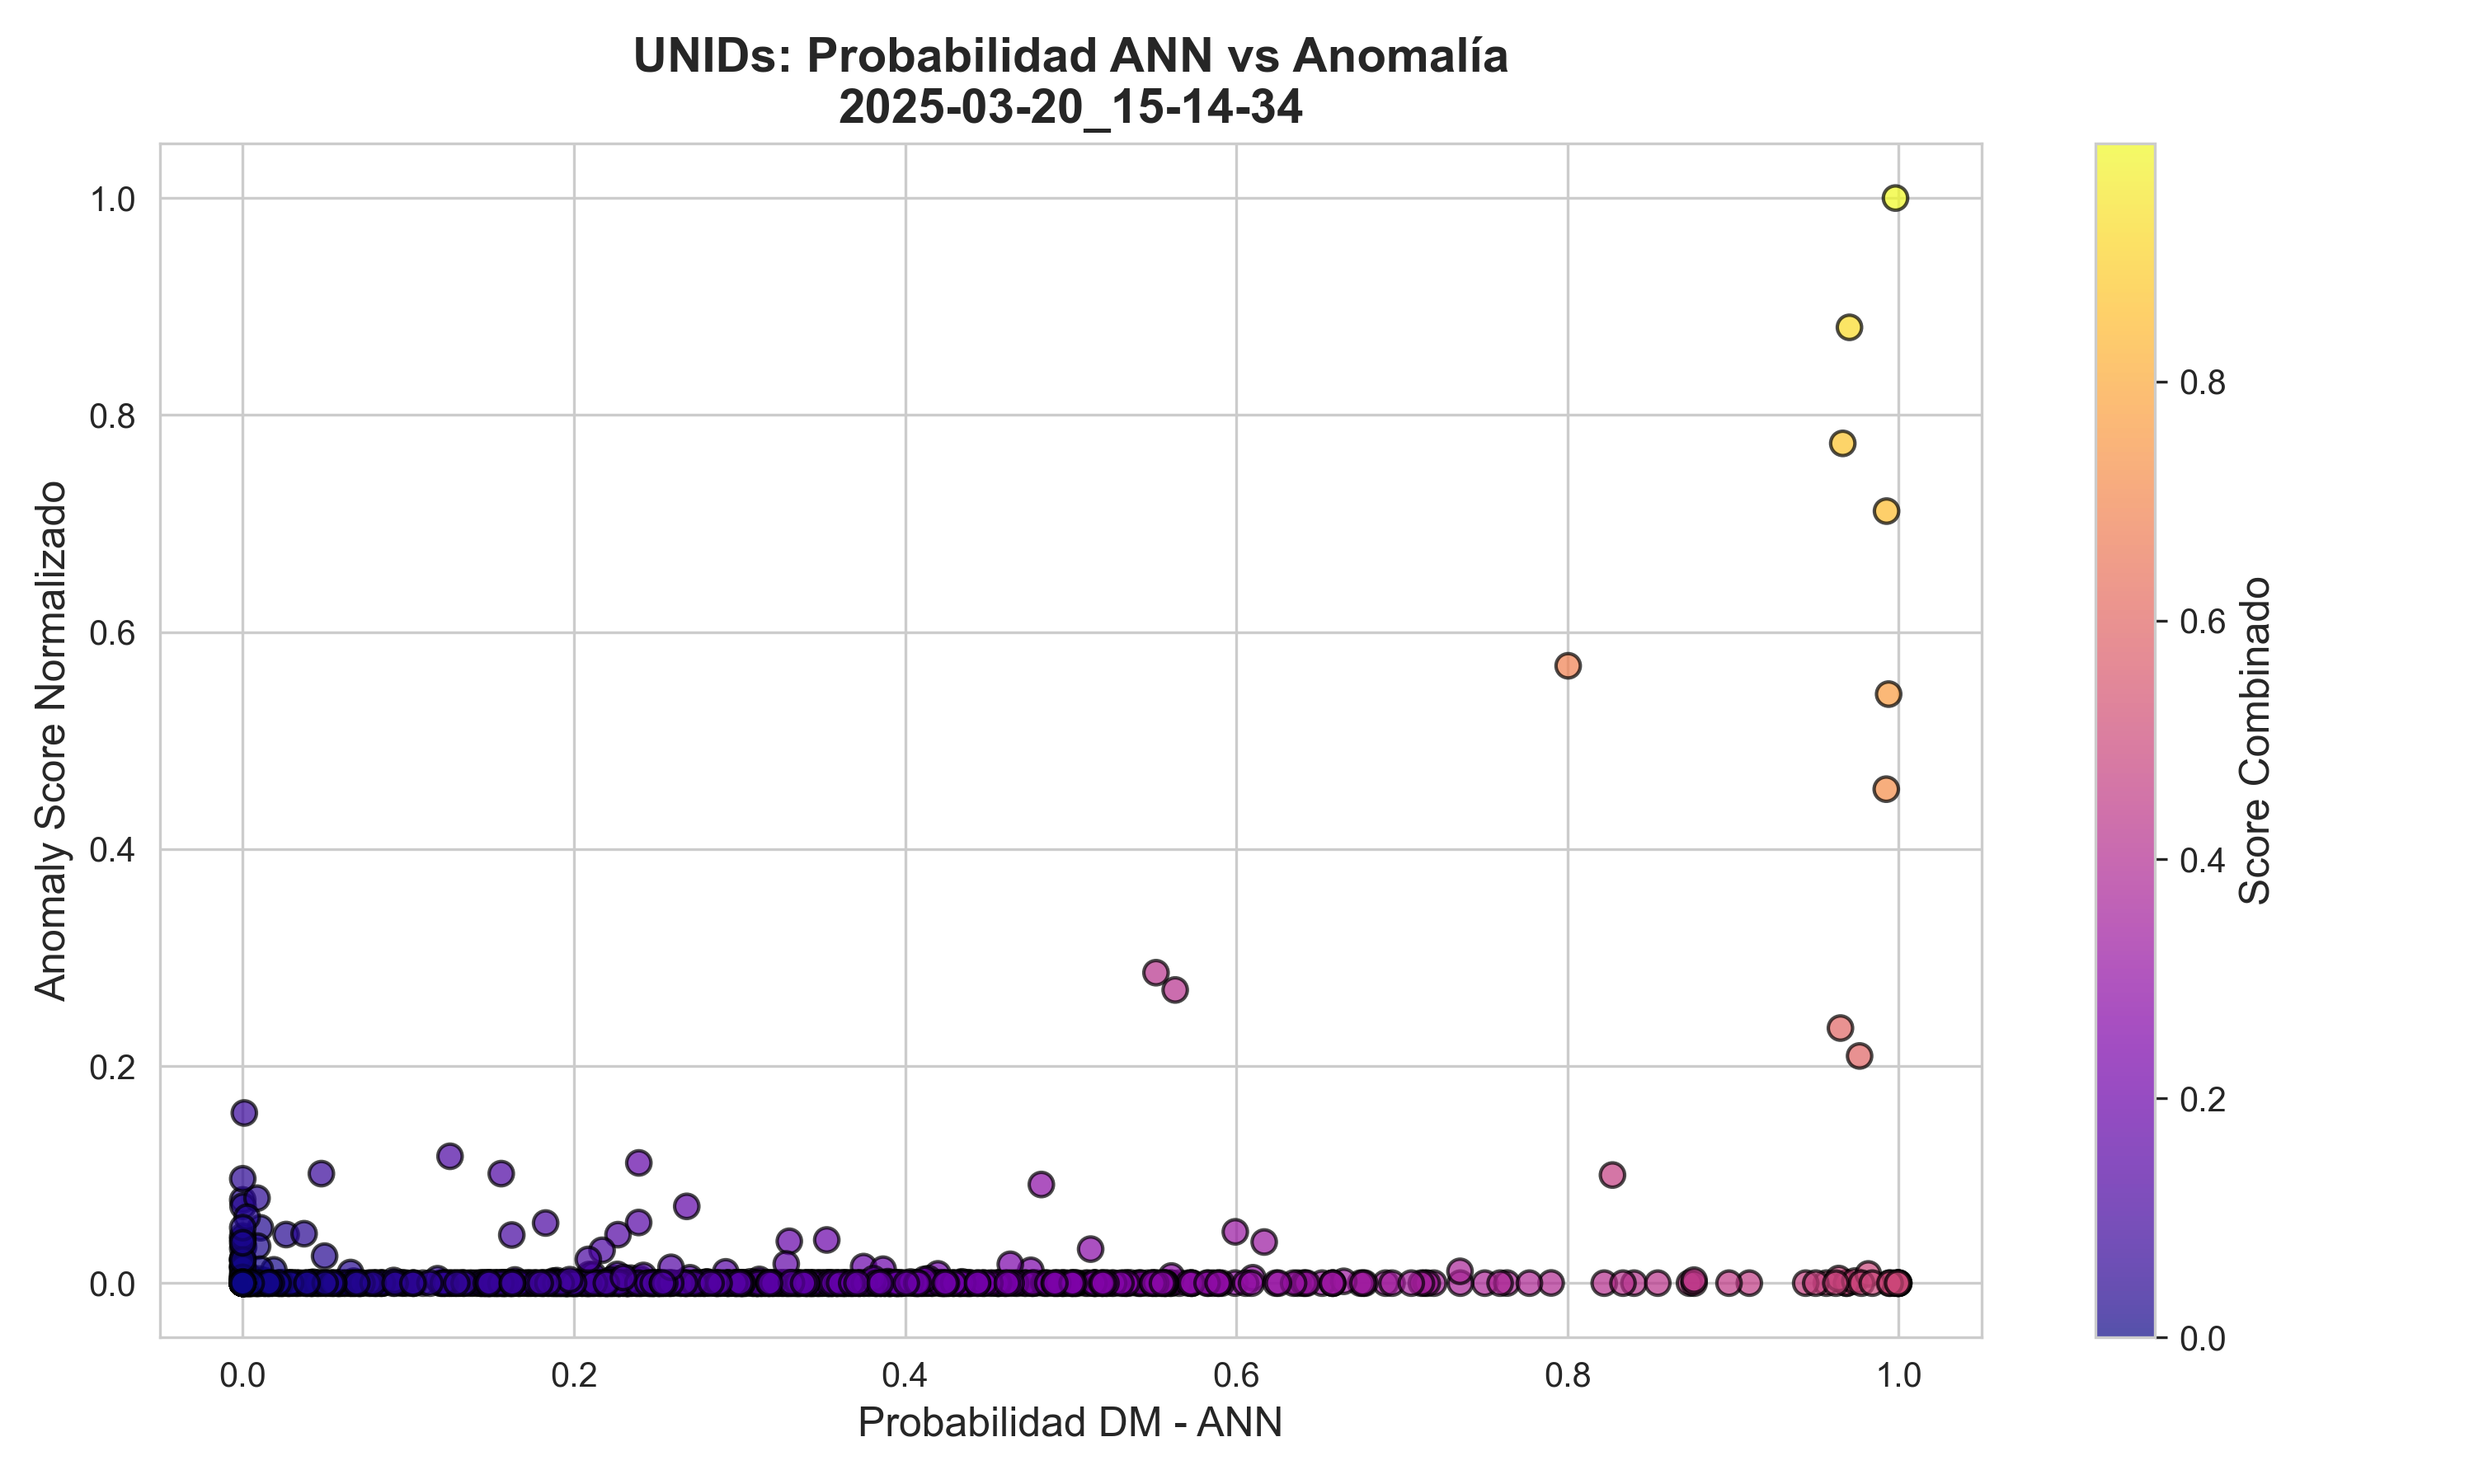

In [122]:
print("Scatter Plot: Probabilidad ANN vs Score Anomalía")
display(Image(filename=scatter_path))


Bar Plot Top 10: Score Combinado


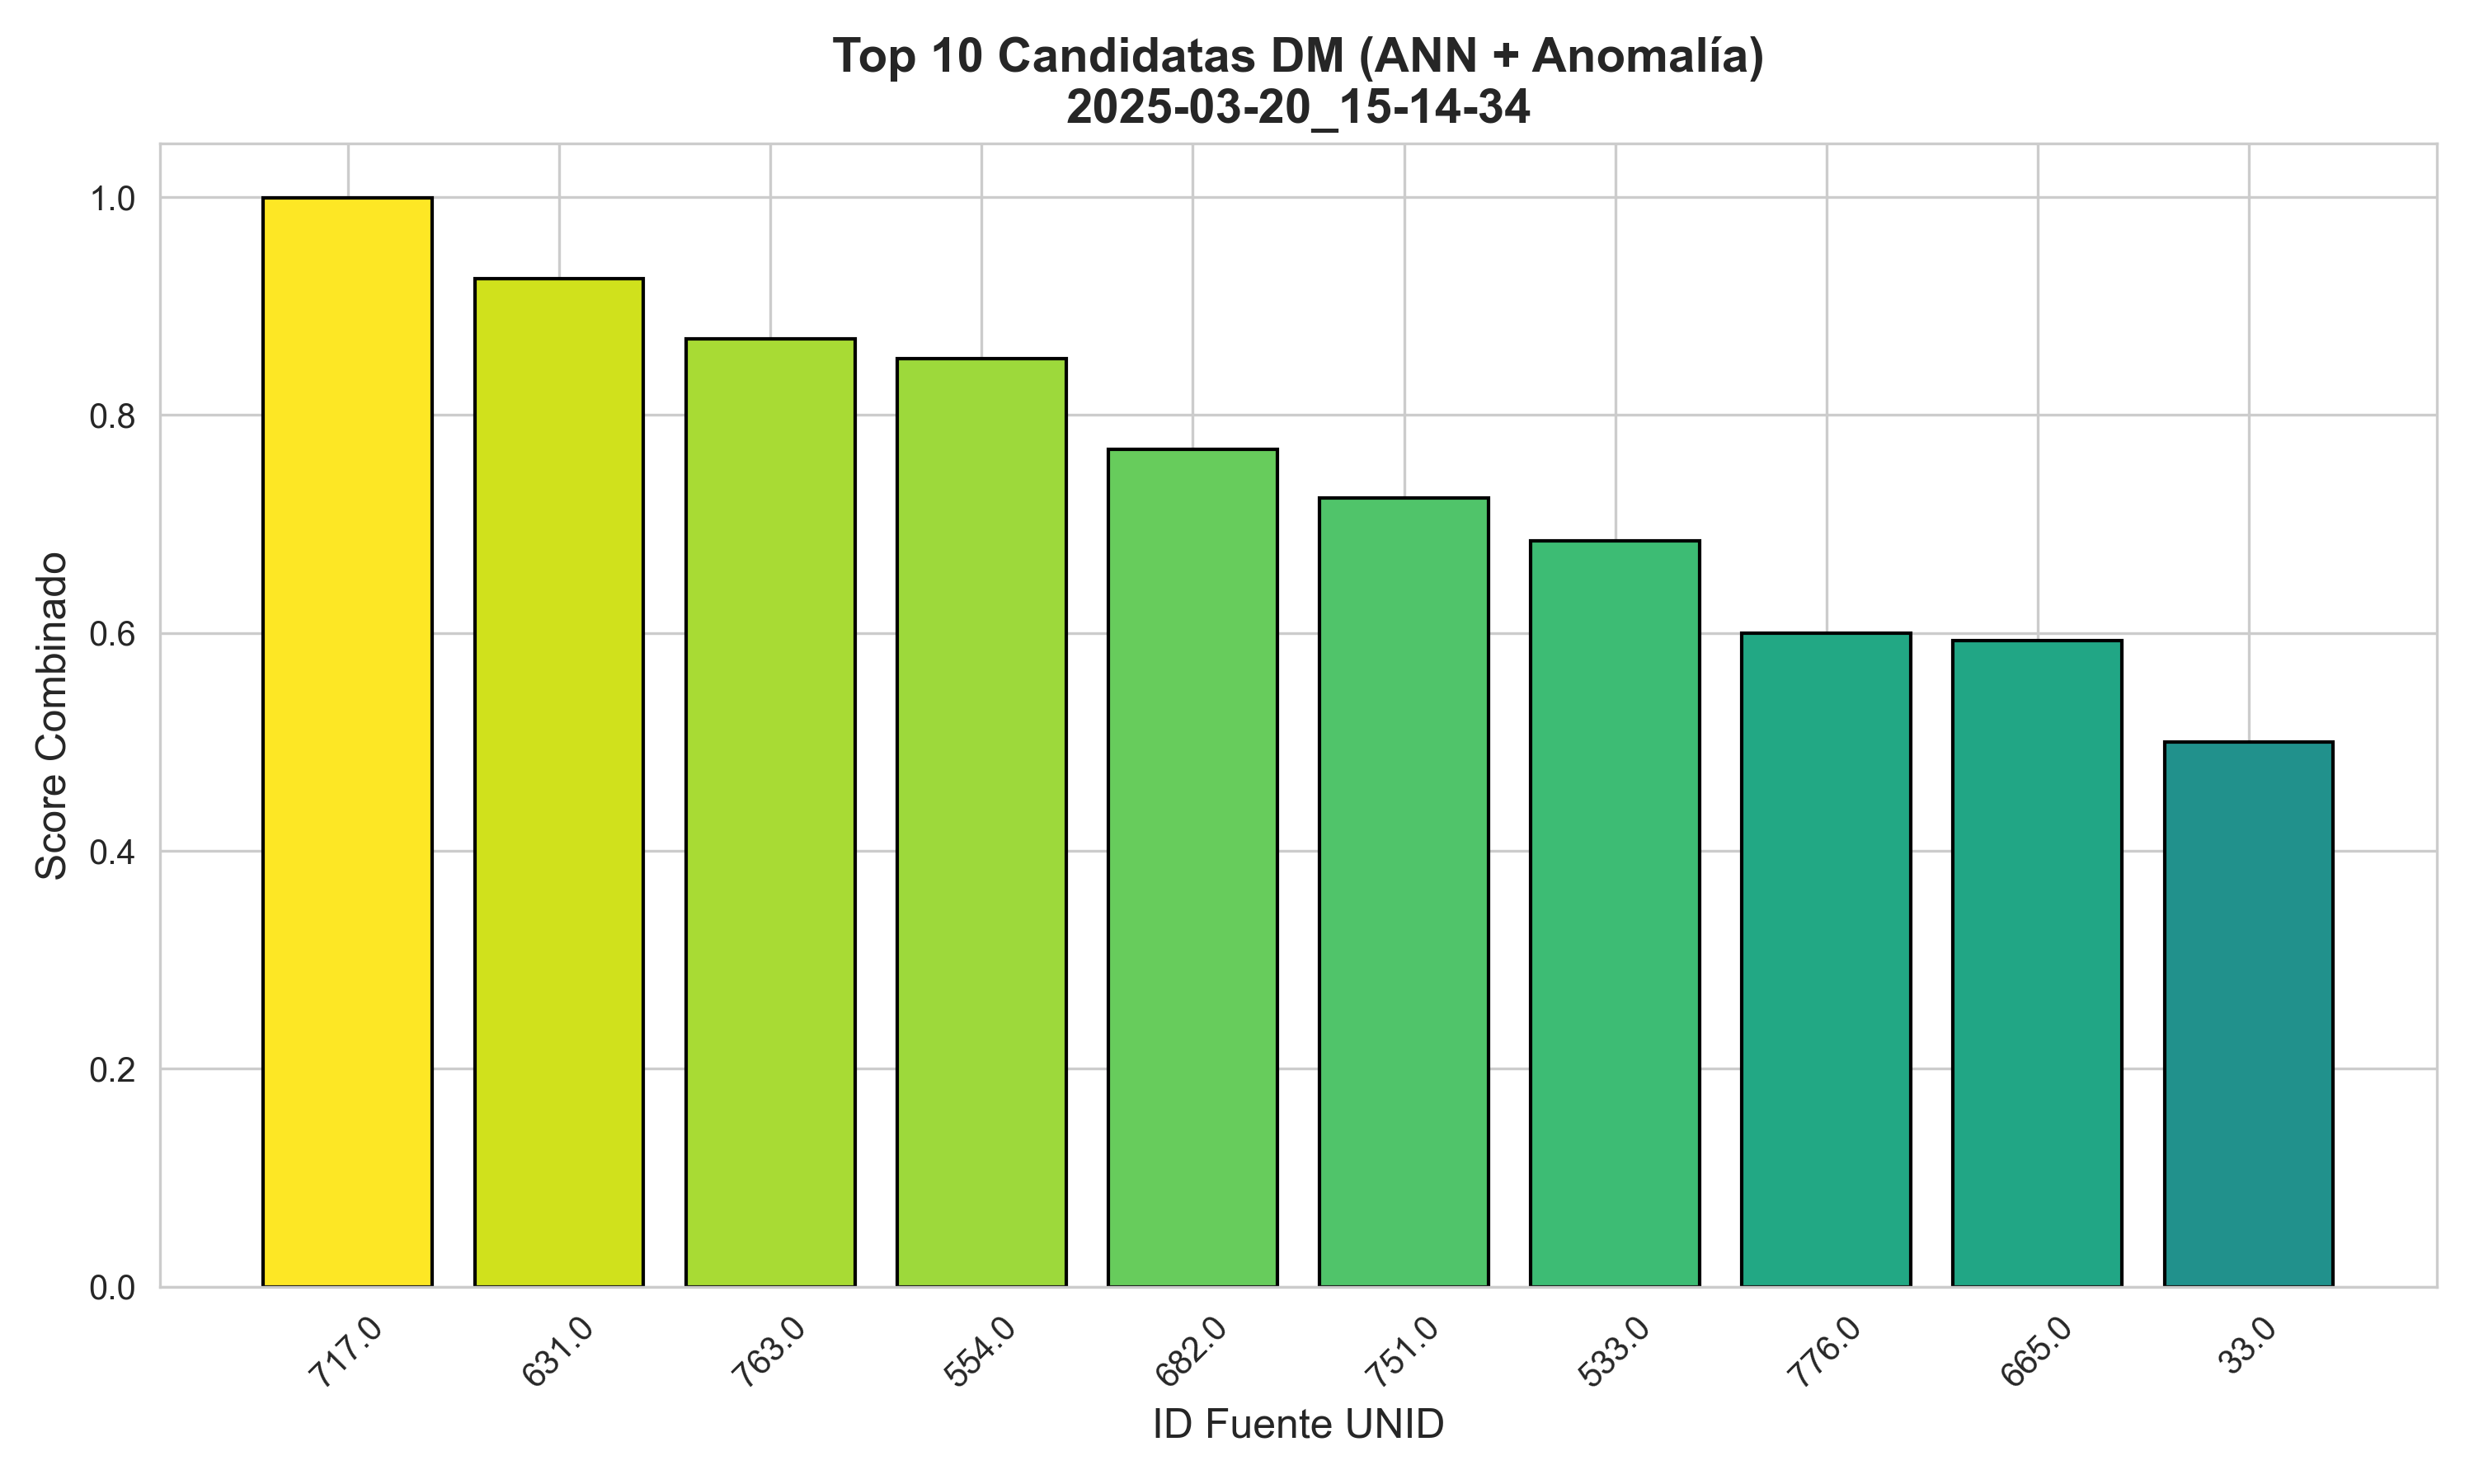

In [123]:
print("Bar Plot Top 10: Score Combinado")
display(Image(filename=bar_path))

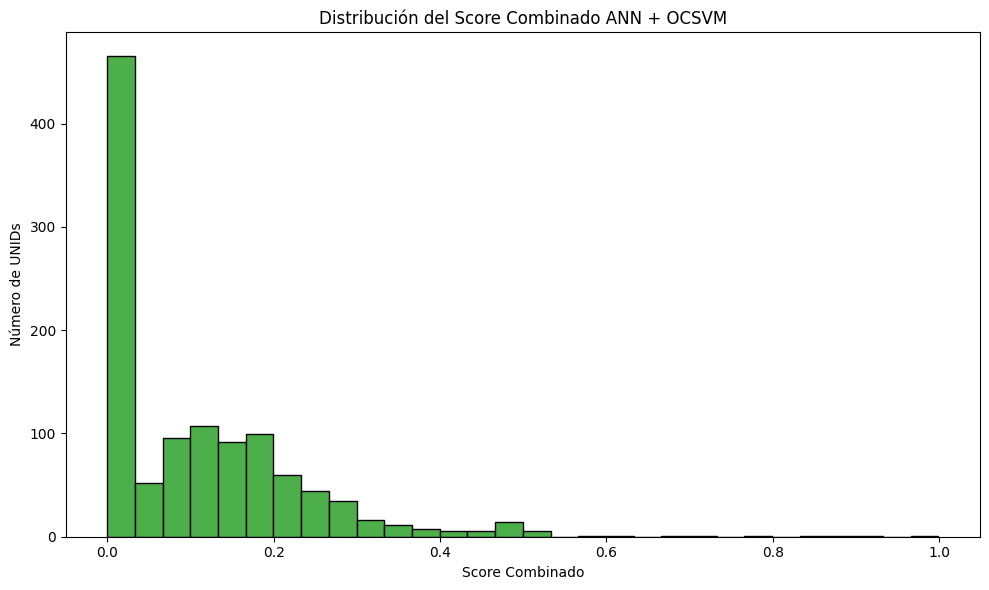

In [124]:
# === Histograma de Score Combinado ===
plt.figure(figsize=(10, 6))
plt.hist(df_full['combined_score'], bins=30, edgecolor='black', color='#4daf4a')
plt.xlabel('Score Combinado')
plt.ylabel('Número de UNIDs')
plt.title('Distribución del Score Combinado ANN + OCSVM')
plt.tight_layout()
plt.show()


In [125]:
print("Resumen del Log de Ejecución:")
with open(log_path, 'r') as file:
    log_content = file.read()
display(Markdown(f'```\n{log_content}\n```'))

Resumen del Log de Ejecución:


```
=== Fusión ANN + OCSVM ===
Timestamp: 2025-03-20_15-14-34

Total UNIDs procesadas: 1125

Ranking combinado:
- Archivo completo: /Users/martacaninoromero/DarkMatter_ML_TFG/outputs/results/unids_combined_ann_ocsvm_2025-03-20_15-14-34.csv
- Top 5 CSV: /Users/martacaninoromero/DarkMatter_ML_TFG/outputs/results/top5_unids_ann_ocsvm_2025-03-20_15-14-34.csv

Gráficos generados:
- Scatter plot: /Users/martacaninoromero/DarkMatter_ML_TFG/outputs/results/scatter_ann_vs_anomaly_2025-03-20_15-14-34.png
- Bar plot Top 10: /Users/martacaninoromero/DarkMatter_ML_TFG/outputs/results/top10_combined_ann_ocsvm_2025-03-20_15-14-34.png

Fuente de anomalías: /Users/martacaninoromero/DarkMatter_ML_TFG/outputs/anomalies/anomalies_ocsvm_astro_2025-03-20_14-17-58.csv

=== Top 5 UNIDs (ANN + Anomalía) ===
  number  prob_ann  anomaly_score_norm  combined_score
717.0000    0.9981              1.0000          0.9990
631.0000    0.9703              0.8809          0.9256
763.0000    0.9662              0.7739          0.8701
554.0000    0.9927              0.7115          0.8521
682.0000    0.9939              0.5428          0.7684
```

In [126]:
# === Resumen Estadístico ===
df_full[['prob_ann', 'anomaly_score_norm', 'combined_score']].describe().round(4)


,prob_ann,anomaly_score_norm,combined_score
count,1125.0000,1125.0000,1125.0000
mean,0.2123,0.0076,0.1100
std,0.2384,0.0601,0.1302
min,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000
50%,0.1625,0.0000,0.0820
75%,0.3527,0.0000,0.1767
max,1.0000,1.0000,0.9990


In [127]:
df_full = pd.read_csv(csv_path)
df_full.head(10)

,number,prob_ann,anomaly_score,anomaly_score_norm,combined_score
0,717.0,0.998058,-11.309239,1.000000,0.999029
1,631.0,0.970258,-11.309259,0.880854,0.925556
2,763.0,0.966221,-11.309277,0.773891,0.870056
3,554.0,0.992657,-11.309288,0.711489,0.852073
4,682.0,0.993922,-11.309317,0.542833,0.768377
5,751.0,0.992487,-11.309331,0.455230,0.723859
6,533.0,0.800395,-11.309312,0.568929,0.684662
7,776.0,0.964825,-11.309369,0.235069,0.599947
8,665.0,0.976381,-11.309373,0.209360,0.592871
9,33.0,1.000000,-11.309409,0.000000,0.500000


In [128]:
# === Tabla Top 20 UNIDs ===
top20 = df_full.sort_values(by='combined_score', ascending=False).head(20).copy()
top20.reset_index(drop=True, inplace=True)
top20.index += 1  # Ranking 1-20
top20.style.bar(subset=['prob_ann', 'anomaly_score_norm', 'combined_score'], color='magenta')


,number,prob_ann,anomaly_score,anomaly_score_norm,combined_score
1,717.000000,0.998058,-11.309239,1.000000,0.999029
2,631.000000,0.970258,-11.309259,0.880854,0.925556
3,763.000000,0.966221,-11.309277,0.773891,0.870056
4,554.000000,0.992657,-11.309288,0.711489,0.852073
5,682.000000,0.993922,-11.309317,0.542833,0.768377
6,751.000000,0.992487,-11.309331,0.455230,0.723859
7,533.000000,0.800395,-11.309312,0.568929,0.684662
8,776.000000,0.964825,-11.309369,0.235069,0.599947
9,665.000000,0.976381,-11.309373,0.209360,0.592871
10,33.000000,1.000000,-11.309409,0.000000,0.500000


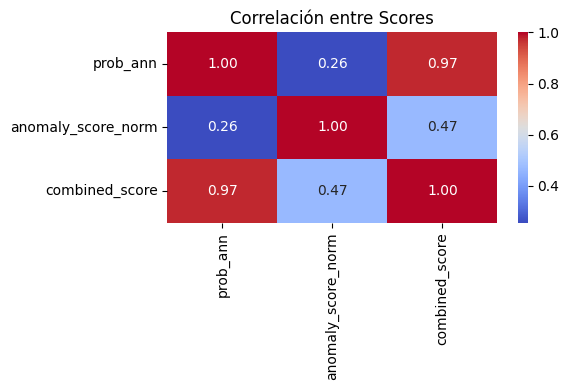

In [129]:
# === Mapa de Calor de Correlación ===
import seaborn as sns
corr = df_full[['prob_ann', 'anomaly_score_norm', 'combined_score']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Scores')
plt.tight_layout()
plt.show()


¿Qué significa tener un score combinado alto?
¿Cuántas fuentes destacan?
¿Qué pasos seguirías después?